In [1]:
require('tidyverse');
require('repr')

Loading required package: tidyverse
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.0.0     v purrr   0.2.5
v tibble  2.0.1     v dplyr   0.7.6
v tidyr   0.8.1     v stringr 1.3.1
v readr   1.1.1     v forcats 0.3.0
Warning message:
"package 'tibble' was built under R version 3.5.2"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Loading required package: repr


In [2]:
df <- as.data.frame(read.csv("Jeans.csv"))

In [3]:
str(df) # str() gives an overview of all the variables. Also available automatically in RStudio

'data.frame':	689 obs. of  6 variables:
 $ StoreID  : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Fashion  : int  182 129 107 117 110 79 73 64 100 126 ...
 $ Leisure  : int  1528 2247 1652 1744 1736 1637 2484 2675 1795 1789 ...
 $ Stretch  : int  496 296 267 419 755 613 468 209 561 180 ...
 $ Original : int  2203 1890 2342 2119 1781 2138 1216 1504 1933 2405 ...
 $ TotalSold: int  4409 4562 4368 4399 4382 4467 4241 4452 4389 4500 ...


In [4]:
# df_num <- select(df, -StoreID, -TotalSold)
# Alternatively 
df_num <- df %>% select(-StoreID, -TotalSold)
# Deselect Total Sold (because of covariance) and StoreID (irrelevance)

# Standardized variables (Z-score) to prepare for clustering. Otherwise, the result may be skewed due to the scale of each variable.
df_std <- scale(df_num)
head(df_std,3)

Fashion,Leisure,Stretch,Original
2.7513038,-1.1071129,0.2454501,1.2126396
1.1263485,0.9422545,-0.6993270,0.1392808
0.4518388,-0.7536754,-0.8363197,1.6893070


In [5]:
# Remove rows with missing data 
df_std_nona <- na.omit(df_std)
nrow(df_std_nona) #Print the number of rows that remain

[1] 689

In [6]:
# Find the index of outliers
outlierIndex <- which(apply(abs(df_std)<=3,1,prod)==0) 
# Remove the outliers
df_std_noli <- as.data.frame(df_std[-outlierIndex, ])
nrow(df_std_noli)

[1] 668

In [7]:
df_clean <- df_std_noli # Make it shorter to type

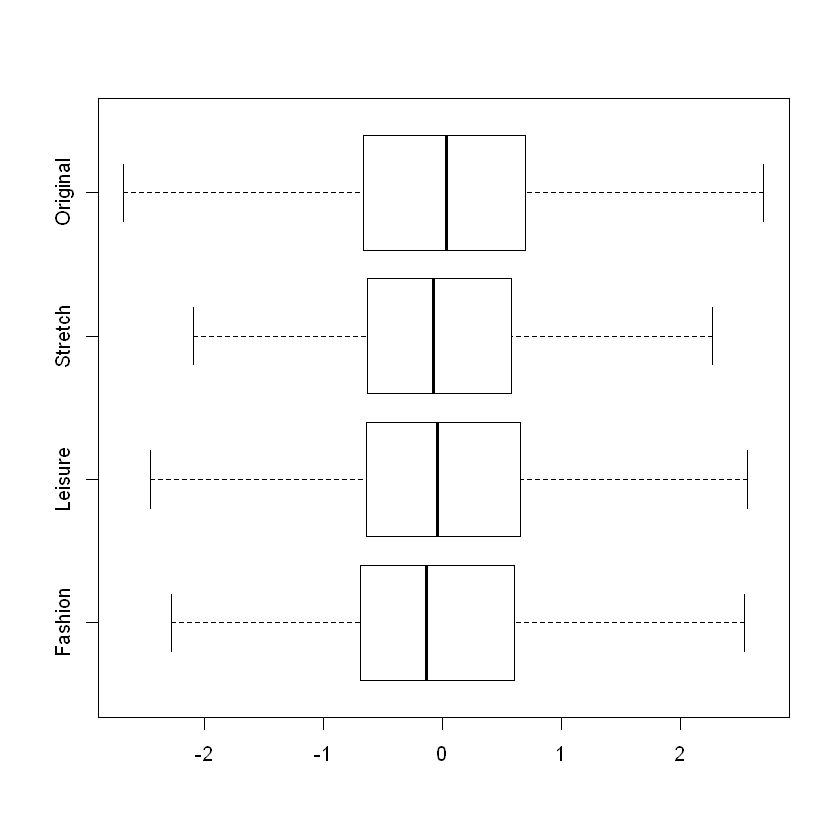

In [8]:
boxplot(df_std, horizontal = TRUE, outline = FALSE)

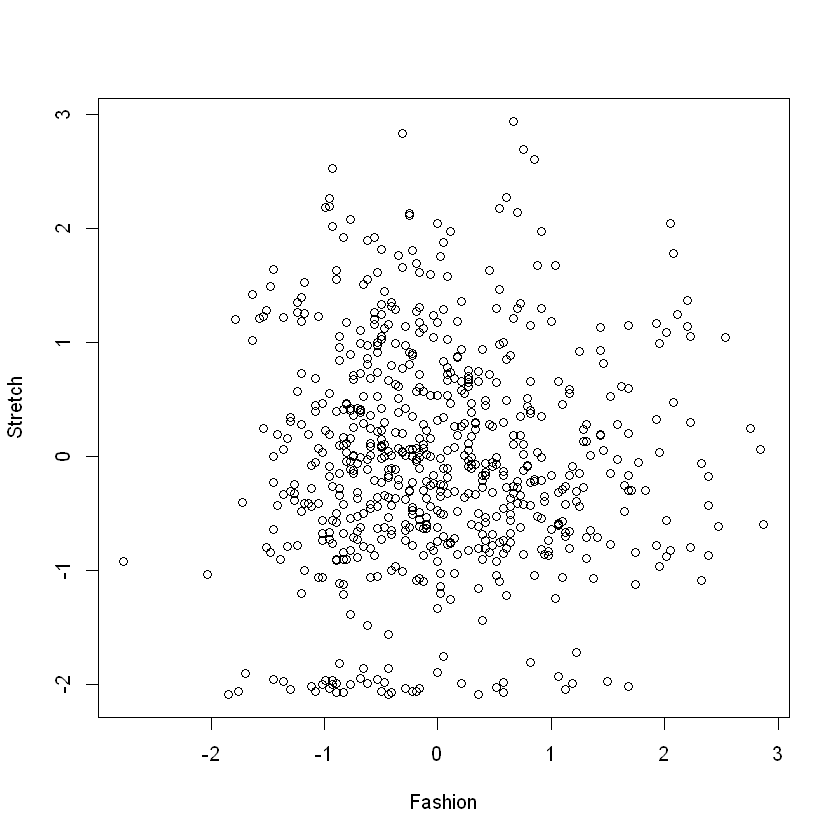

In [9]:
plot(df_clean$Fashion, df_clean$Stretch, xlab="Fashion", ylab ="Stretch")

In [10]:
set.seed(1)

In [11]:
require(cluster)

Loading required package: cluster


In [12]:
# Use var() to calculate variance
# Fill empty list wss with the first value - the Total Variance for when there is no cluster.
wss <- (nrow(df_clean)-1)*sum(apply(df_clean,2,var))
# wss <- list()

In [13]:
wss

[1] 2359.585

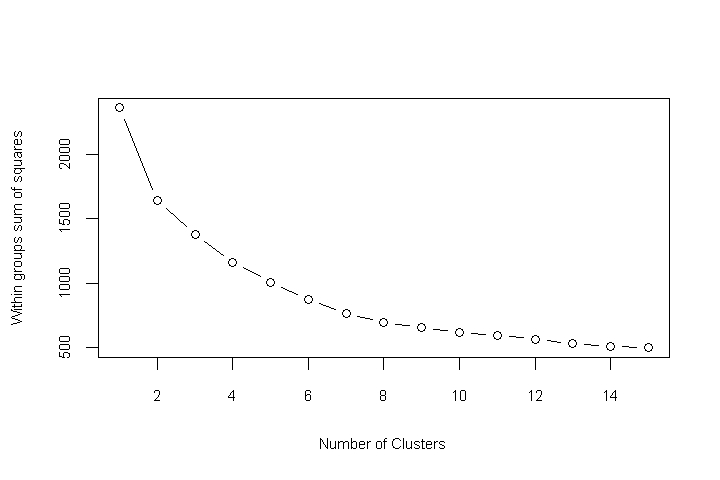

In [24]:
# Set max clusters arbitrarily at 15.
max_clusters = 15

#Find the optimal number of centroids
# Calculate the within groups SSE (Cohesion) for different numbers of cluster solutions

for (i in 2:max_clusters) 
    wss[i] <- sum(kmeans(df_clean, centers=i, iter.max=500)$withinss)
options(repr.plot.width = 6, repr.plot.height = 4)
plot(1:max_clusters, wss, type="b", xlab="Number of Clusters",
  ylab="Within groups sum of squares",cex.lab=0.75,cex.axis=0.75)

- Based on where the line "breaks", we choose. This is the Elbow method.
- Based on the chart, maybe 6 is a good idea.



R provides Lloyd's algorithm as an option to kmeans(); the default algorithm, by Hartigan and Wong (1979) is much smarter. Like MacQueen's algorithm (MacQueen, 1967), it updates the centroids any time a point is moved; it also makes clever (time-saving) choices in checking for the closest cluster. On the other hand Lloyd's k-means algorithm is the first and simplest of all these clustering algorithms.

In [15]:
# Settle on one cluster for demonstration
k2 <- kmeans(df_clean, centers=6, iter.max=500, nstart = 25)

In [16]:
k2

K-means clustering with 6 clusters of sizes 129, 105, 106, 45, 118, 165

Cluster means:
      Fashion     Leisure     Stretch   Original
1 -0.06889797 -0.56973146 -0.28446735  1.2324974
2 -0.22997087 -0.93327160  1.41067517  0.4611741
3 -0.07139800  1.50707155 -0.42119713 -1.1936991
4 -0.42229861 -0.71858501 -1.95115670 -0.8757044
5  1.31965945  0.07726023 -0.03085720  0.1394261
6 -0.54245920  0.44739022  0.08082982 -0.1969116

Clustering vector:
  [1] 5 5 1 1 2 2 3 3 2 1 4 1 6 3 4 5 1 6 5 3 6 6 5 6 2 6 2 1 1 6 1 1 1 6 3 2 4
 [38] 1 5 2 2 5 2 6 2 4 5 6 3 6 6 1 6 5 5 6 3 2 3 4 2 3 1 5 2 6 1 2 6 3 3 4 3 2
 [75] 6 3 2 6 5 1 6 6 3 3 4 6 2 3 6 4 6 5 2 6 5 5 4 2 1 2 3 5 4 2 1 6 6 2 6 4 6
[112] 3 3 4 5 4 4 2 5 2 4 1 6 6 3 6 5 6 6 1 1 2 2 1 3 3 1 5 1 2 2 1 1 1 5 3 4 1
[149] 6 5 2 6 6 5 4 6 6 6 6 5 3 6 5 1 1 6 2 2 6 6 6 6 1 5 1 1 3 3 2 2 5 4 3 6 5
[186] 5 1 2 1 1 2 4 1 5 3 2 5 5 6 2 6 5 1 6 3 6 5 6 2 4 6 6 6 2 1 5 6 1 6 4 5 6
[223] 6 3 6 5 6 5 1 2 5 1 2 6 6 4 3 2 6 2 1 3 5 4 6 6 3 4 5 1 1 6 6 3

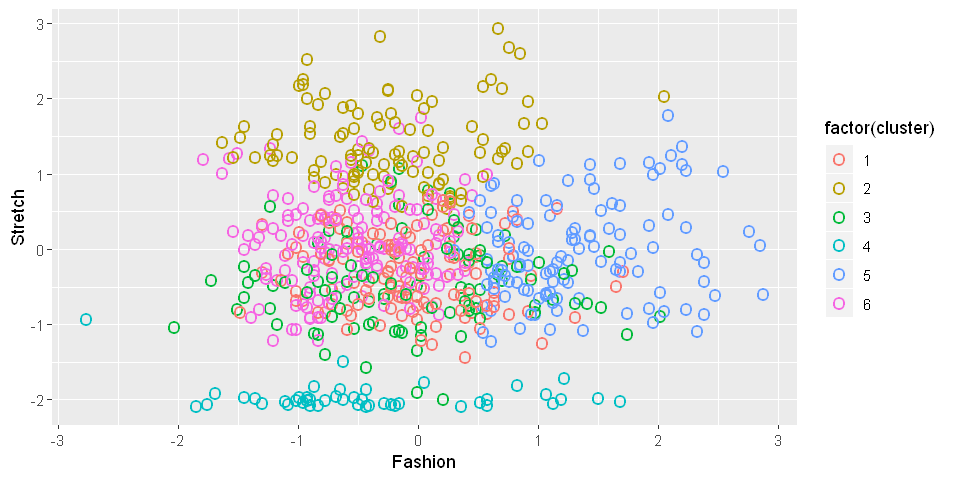

In [17]:
df_clean %>%
  as_tibble() %>%
  mutate(cluster = k2$cluster) %>%
  ggplot(aes(Fashion, Stretch, color = factor(cluster))) +
  geom_point(shape="o", size=5)

# Have to understand what mutate does exactly